In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "education_data_set.csv"
data = pd.read_csv(file_path)



In [5]:
# Display the first few rows to understand the structure
data.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,22.176781,21.750540,20.634081,21.877630,19.617979,23.201380,21.853750,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,17.548059,17.022470,17.315451,17.243259,18.097099,16.962910,17.198811,17.150761,17.306705,15.35272,14.564090,13.65829
2,Afghanistan,17.067560,16.048429,14.620000,14.102800,14.465930,12.509000,13.091000,12.033200,11.696060,11.34377,10.253860,10.88011
3,Africa Western and Central,17.057570,14.563540,14.332880,14.963605,12.939880,13.121995,12.854880,16.058439,16.114195,14.15939,14.339985,14.93463
4,Angola,8.684770,8.940000,8.370430,8.826970,6.162840,8.918780,6.550970,6.763780,5.410230,6.04536,6.467230,6.91961


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Optionally, fill or drop missing values
data = data.fillna(method='ffill')  # Forward fill missing values as an example

# Verify data types
data.info()

Missing values in each column:
 Country Name      0
2010             64
2011             64
2012             50
2013             56
2014             50
2015             36
2016             39
2017             37
2018             40
2019             42
2020             55
2021            134
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   2010          266 non-null    float64
 2   2011          266 non-null    float64
 3   2012          266 non-null    float64
 4   2013          266 non-null    float64
 5   2014          266 non-null    float64
 6   2015          266 non-null    float64
 7   2016          266 non-null    float64
 8   2017          265 non-null    float64
 9   2018          265 non-null    float64
 10  2019          265 non-null    float64
 11  2020          265 non-null

C:\Users\Admin\AppData\Local\Temp\ipykernel_13576\3939727637.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values as an example


In [7]:
# Display summary statistics
data.describe()

# Calculate correlations between years
correlations = data.iloc[:, 1:].corr()
correlations


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2010,1.000000,0.730534,0.627987,0.617822,0.651283,0.605628,0.579857,0.608089,0.528697,0.454451,0.431654,0.270333
2011,0.730534,1.000000,0.820380,0.735605,0.739784,0.661181,0.671011,0.644964,0.520524,0.436450,0.398653,0.262296
2012,0.627987,0.820380,1.000000,0.792649,0.792476,0.705236,0.670072,0.650068,0.537089,0.465019,0.378785,0.296114
2013,0.617822,0.735605,0.792649,1.000000,0.838633,0.766163,0.742489,0.737070,0.656677,0.587872,0.522326,0.406396
2014,0.651283,0.739784,0.792476,0.838633,1.000000,0.835692,0.795116,0.775540,0.702411,0.620195,0.527255,0.367851
2015,0.605628,0.661181,0.705236,0.766163,0.835692,1.000000,0.849825,0.806639,0.708212,0.626407,0.599087,0.387423
2016,0.579857,0.671011,0.670072,0.742489,0.795116,0.849825,1.000000,0.884628,0.741099,0.666848,0.648493,0.392351
2017,0.608089,0.644964,0.650068,0.737070,0.775540,0.806639,0.884628,1.000000,0.813218,0.731521,0.694353,0.450320
2018,0.528697,0.520524,0.537089,0.656677,0.702411,0.708212,0.741099,0.813218,1.000000,0.879401,0.689679,0.523967
2019,0.454451,0.436450,0.465019,0.587872,0.620195,0.626407,0.666848,0.731521,0.879401,1.000000,0.730013,0.553593


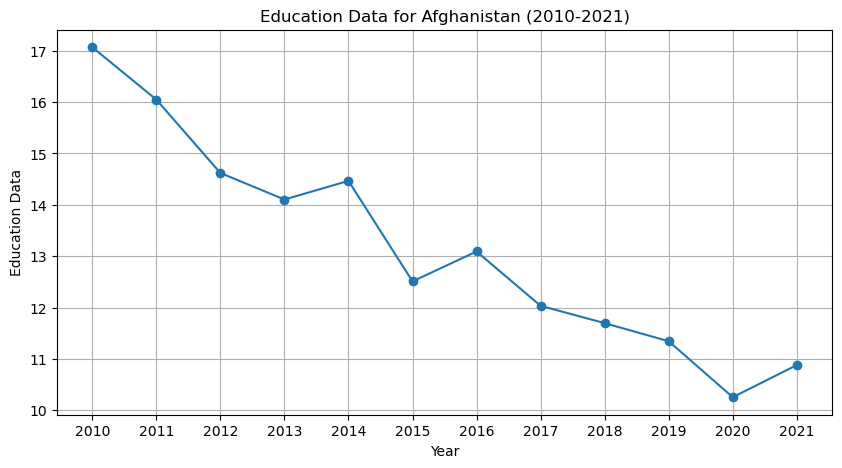

In [9]:
# Line plot for Afghanistan over the years
plt.figure(figsize=(10, 5))
plt.plot(data.columns[1:], data[data['Country Name'] == 'Afghanistan'].iloc[0, 1:], marker='o')
plt.title('Education Data for Afghanistan (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Education Data')
plt.grid()
plt.show()


In [11]:
import matplotlib.pyplot as plt

def plot_histogram(year):
    plt.figure(figsize=(10, 6))
    plt.hist(data[year].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Education Data for {year}')
    plt.xlabel('Education Data')
    plt.ylabel('Frequency')
    plt.show()

In [12]:
def plot_bar_chart():
    country_means = data.set_index('Country Name').mean(axis=1)
    
    plt.figure(figsize=(12, 6))
    country_means.plot(kind='bar', color='coral')
    plt.title('Average Education Data by Country (2010-2021)')
    plt.xlabel('Country')
    plt.ylabel('Average Education Data')
    plt.xticks(rotation=90)
    plt.show()

In [13]:
def plot_line(country_name):
    years = data.columns[1:]
    values = data[data['Country Name'] == country_name].iloc[0, 1:]
    
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o', color='green')
    plt.title(f'Education Data Trend for {country_name} (2010-2021)')
    plt.xlabel('Year')
    plt.ylabel('Education Data')
    plt.grid()
    plt.show()

In [14]:
def plot_scatter(year1, year2):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[year1], data[year2], color='purple', alpha=0.6)
    plt.title(f'Scatter Plot of Education Data: {year1} vs. {year2}')
    plt.xlabel(f'Education Data {year1}')
    plt.ylabel(f'Education Data {year2}')
    plt.grid(True)
    plt.show()

In [15]:
def plot_heatmap():
    correlations = data.iloc[:, 1:].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Education Data (2010-2021)')
    plt.show()

In [16]:
def plot_box():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data.iloc[:, 1:], palette='Set2')
    plt.title('Box Plot of Education Data Across Years')
    plt.xlabel('Year')
    plt.ylabel('Education Data')
    plt.show()